In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=[10,20]

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

## Data Cleaning

In [4]:
df.groupby("area_type").area_type.agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df1=df.drop(['area_type','availability','balcony','society'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df2=df1.dropna()
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df2['BHK']=df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\abhav\AppData\Local\Temp\ipykernel_23540\2737495042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [11]:
df2=df2.drop('size',axis='columns')
df2.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [12]:
df2[df2['BHK']>20]

,location,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [13]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(z):
    try:
        float(z)
    except:
        return False
    return True

In [15]:
df2[~df2.total_sqft.apply(is_float)].head(10)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
convert_sqft_to_num('2166')

2166.0

In [18]:
convert_sqft_to_num('2100-2850')

2475.0

In [19]:
convert_sqft_to_num('34.46Sq. Meter')

In [20]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)

In [21]:
df3.loc[30]['total_sqft']

2475.0

## Feature Engineering

In [22]:
df4=df3.copy()

In [23]:
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']

In [24]:
df4.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [25]:
len(df4.location.unique())

1304

In [26]:
df4.location=df4.location.apply(lambda x: x.strip())
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [27]:
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [28]:
len(location_stats[location_stats<=10])

1052

In [29]:
location_stats_which_less_than_ten=location_stats[location_stats<=10]
location_stats_which_less_than_ten.sample(20).sort_values(ascending=False)

location
Peenya                            9
Vignana Nagar                     9
Attur Layout                      5
VGP Layout                        5
2nd Block Jayanagar               4
Doddagubbi                        4
Yeshwanthpur Industrial Suburb    3
Crimson Layout                    3
Anugrah Layout                    2
frazertown                        2
Jayamahal Extension               2
Thavarekere                       1
Jakkasandra                       1
Kanakapura Road                   1
Whitefield ECC Road               1
Venkateswara Nagar                1
Off Bannergatta Road              1
Haralur Road,                     1
Narayanappa Garden                1
Shauhardha Layout                 1
Name: location, dtype: int64

In [30]:
len(df4.location.unique())

1293

In [31]:
df4.location=df4.location.apply(lambda x: 'o' if x in location_stats_which_less_than_ten else x)
len(df4.location.unique())

242

## Outlier Detection and removal

In [32]:
## Let the threshold of total_sqft/bhk be 300

In [33]:
df4[(df4.total_sqft/df4.BHK)<300].sample(5)

,location,total_sqft,bath,price,BHK,price_per_sqft
5840,TC Palaya,1500.0,8.0,150.0,8,10000.000000
1980,Jalahalli East,800.0,2.0,80.0,3,10000.000000
10133,Padmanabhanagar,610.0,2.0,75.0,3,12295.081967
11172,ISRO Layout,950.0,4.0,180.0,4,18947.368421
9355,Mysore Road,540.0,4.0,85.0,4,15740.740741


In [34]:
df4.shape

(13246, 6)

In [35]:
df5=df4[~(df4.total_sqft/df4.BHK<300)]

In [36]:
df5.shape

(12502, 6)

In [37]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [38]:
def remove_outliers_pp(df):
    p=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean1=np.mean(subdf.price_per_sqft)
        std1=np.std(subdf.price_per_sqft)
        df_new=subdf[(subdf.price_per_sqft>(mean1-std1)) & (subdf.price_per_sqft<=(mean1+std1))]
        p=pd.concat([p,df_new],ignore_index=True)
    return p

In [39]:
df6=remove_outliers_pp(df5)
df6.shape

(10241, 6)

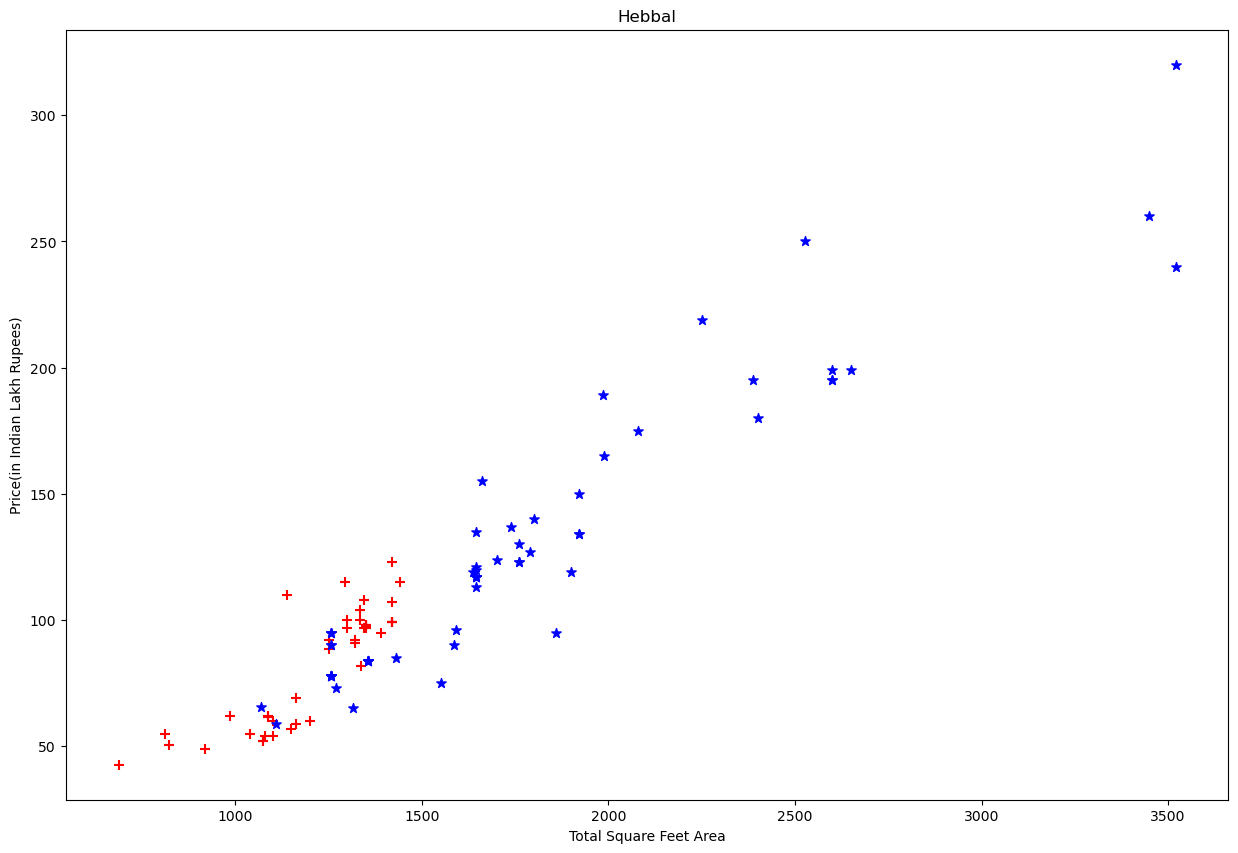

In [40]:
def plot_scatter_chart(df,location):
    bhk_2=df[(df.location==location) & (df.BHK==2)]
    bhk_3=df[(df.location==location) & (df.BHK==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk_2.total_sqft,bhk_2.price,color='red',marker='+',label='2-BHK',s=50)
    plt.scatter(bhk_3.total_sqft,bhk_3.price,color='blue',marker='*',label='3-BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price(in Indian Lakh Rupees)")
    plt.title(location)
    plt.show()
plot_scatter_chart(df6,'Hebbal')

In [41]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)

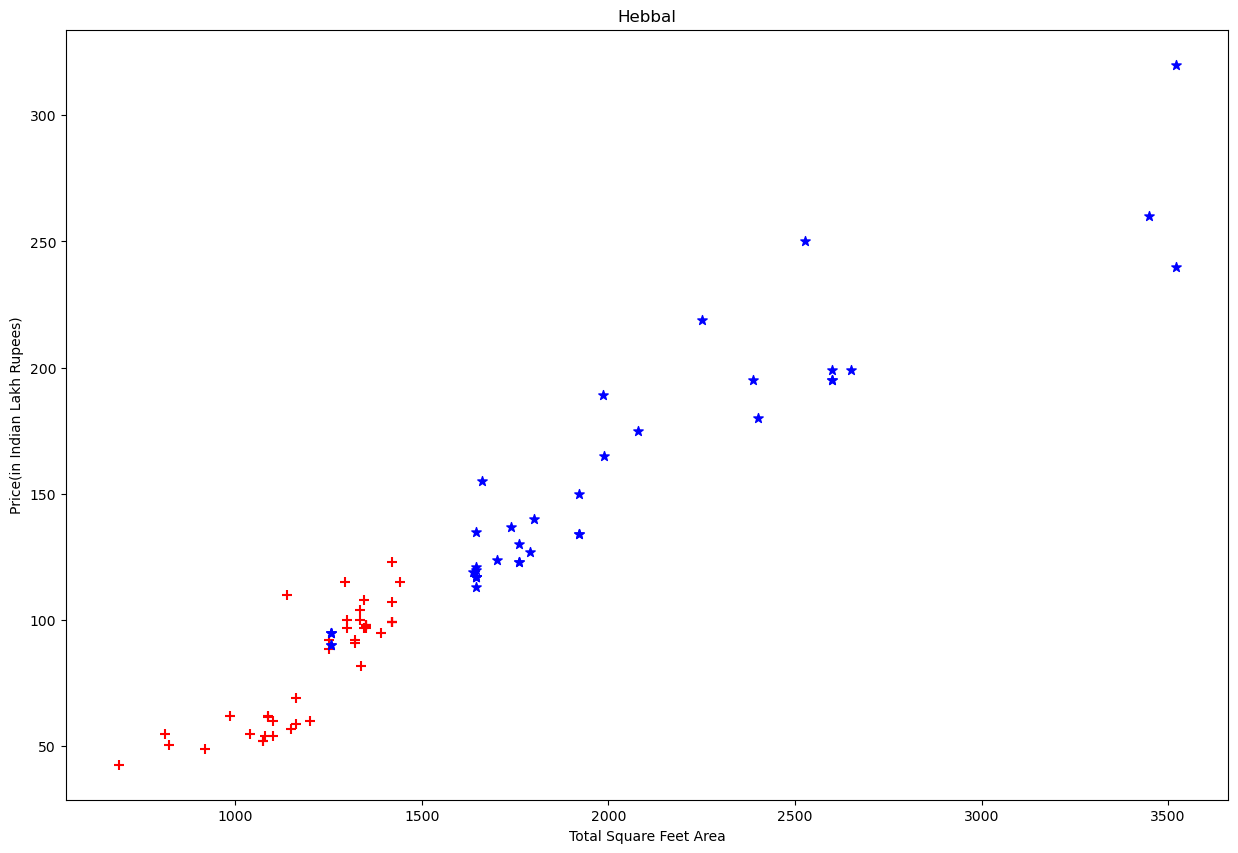

In [42]:
plot_scatter_chart(df7,'Hebbal')

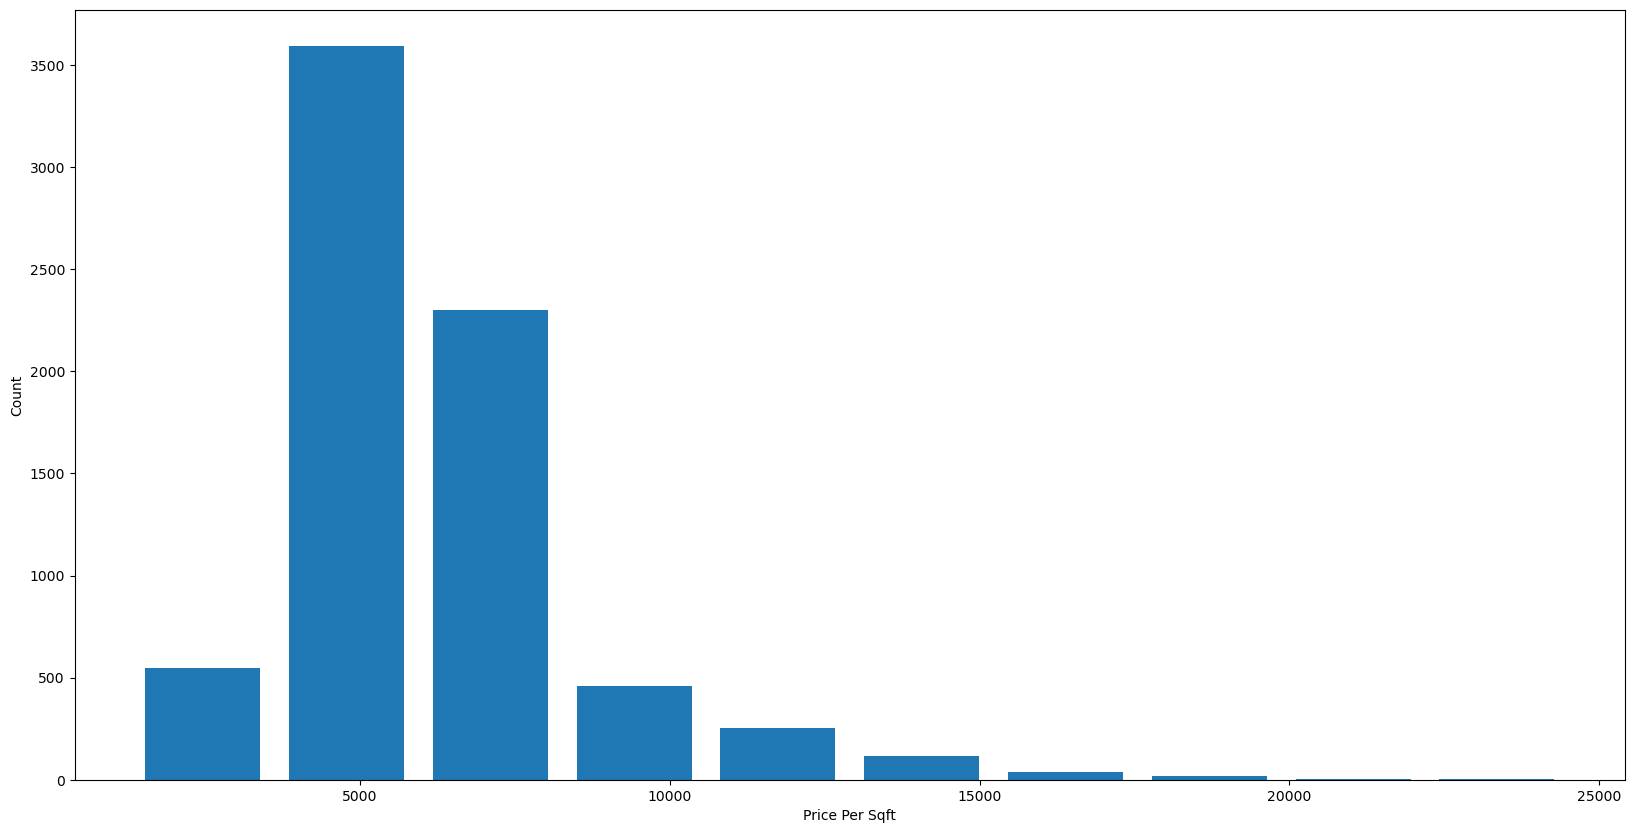

In [43]:
plt.figure(figsize=(20,10))
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Sqft")
plt.ylabel("Count")
plt.show()

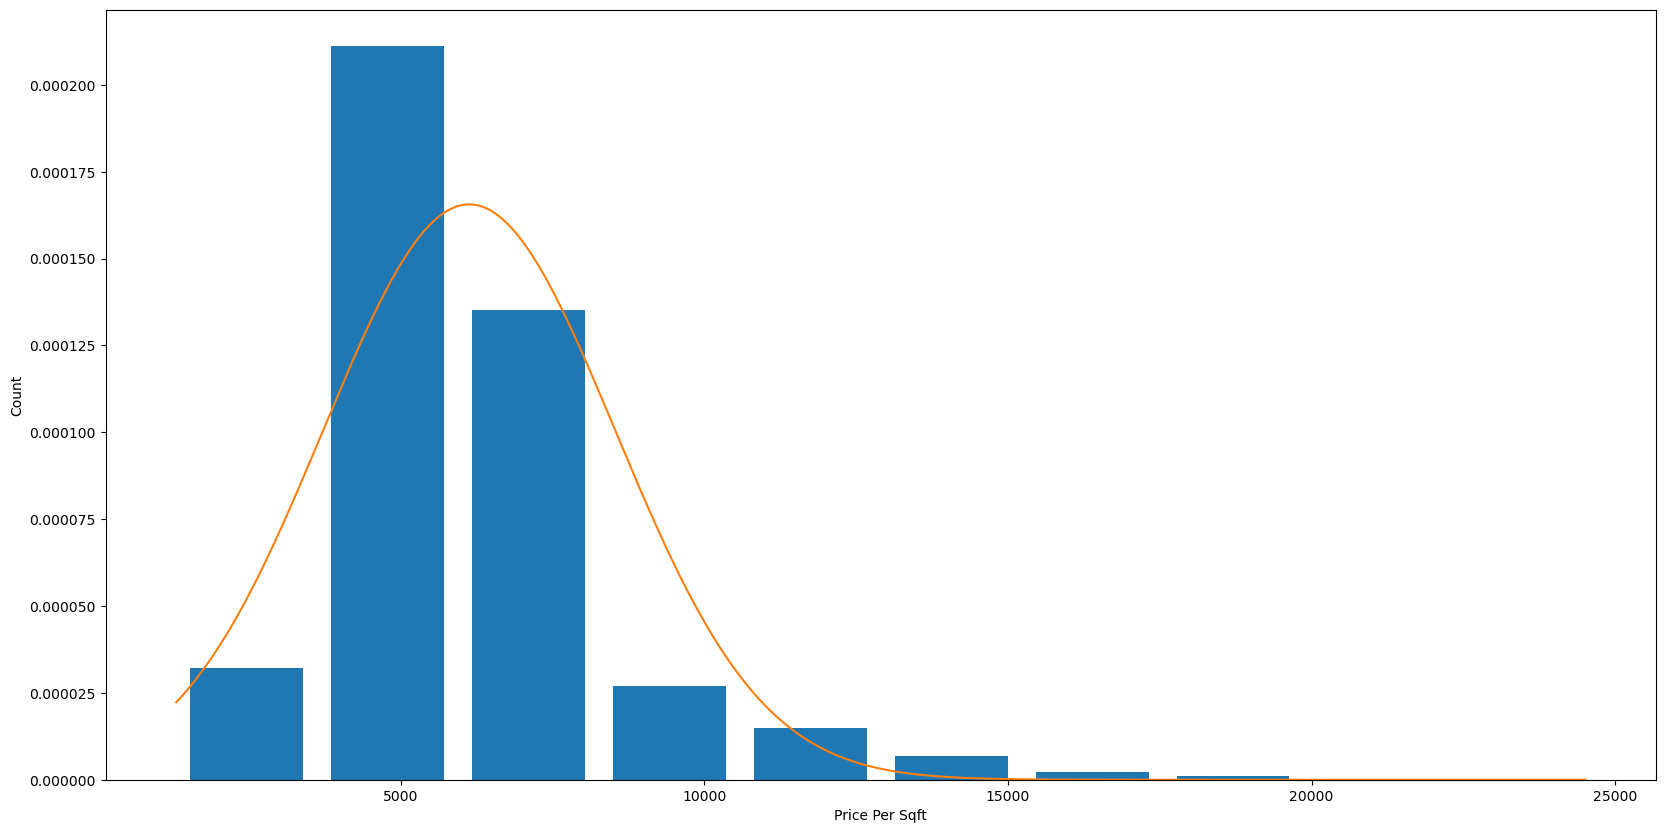

In [44]:
from scipy.stats import norm
import numpy as np
plt.figure(figsize=(20,10))
plt.hist(df7.price_per_sqft,rwidth=0.8,density=True)
plt.xlabel("Price Per Sqft")
plt.ylabel("Count")
rng=np.arange(df7.price_per_sqft.min(),df7.price_per_sqft.max(),0.1)
plt.plot(rng,norm.pdf(rng,df7.price_per_sqft.mean(),df7.price_per_sqft.std()))
plt.show()

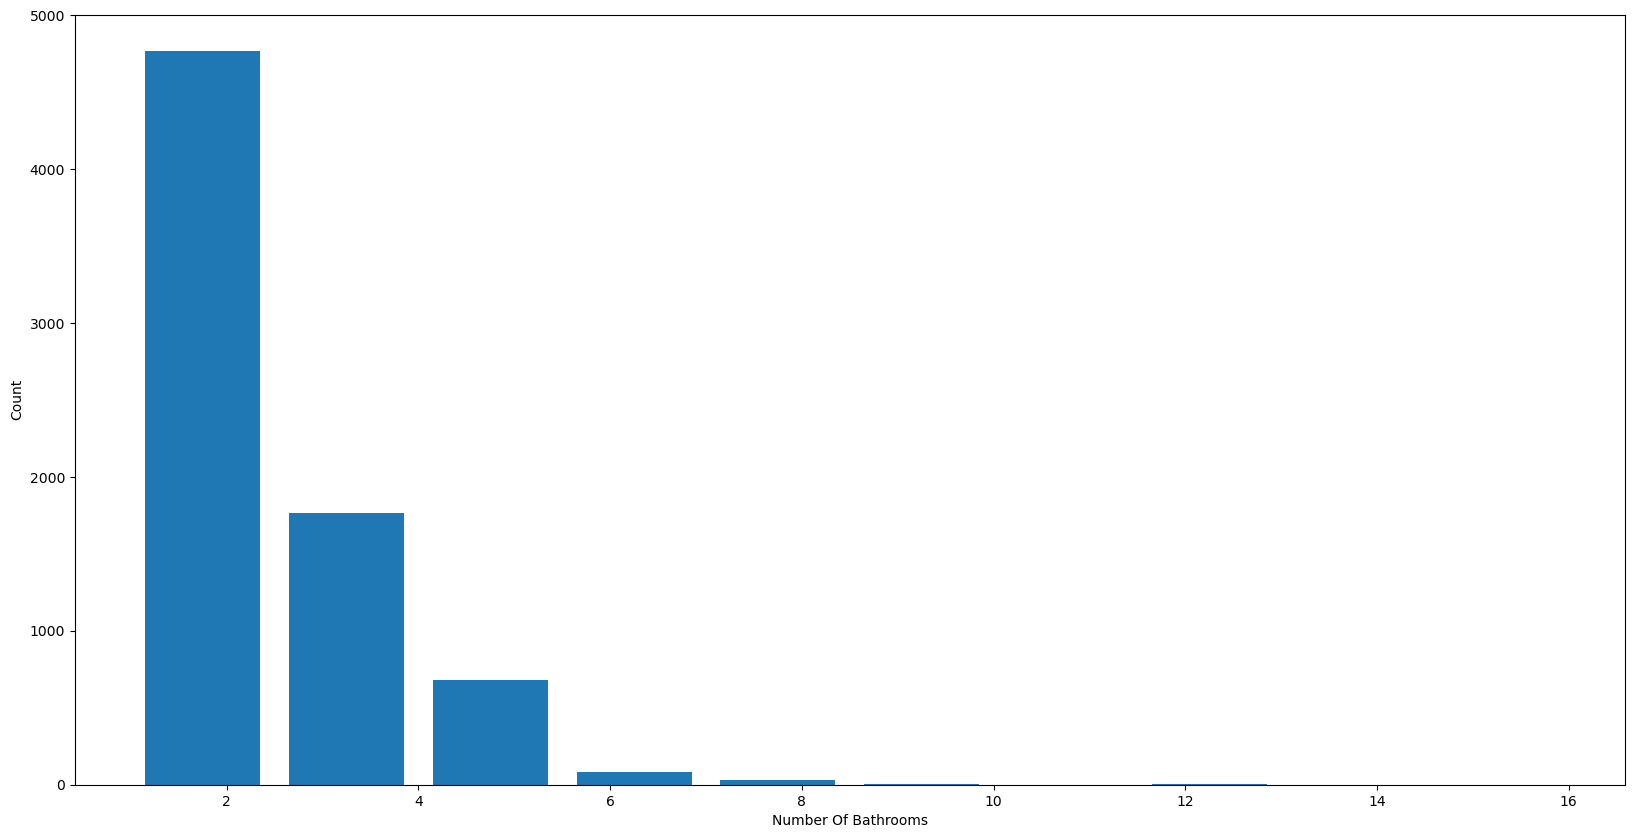

In [45]:
plt.figure(figsize=(20,10))
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel('Number Of Bathrooms')
plt.ylabel('Count')
plt.show()

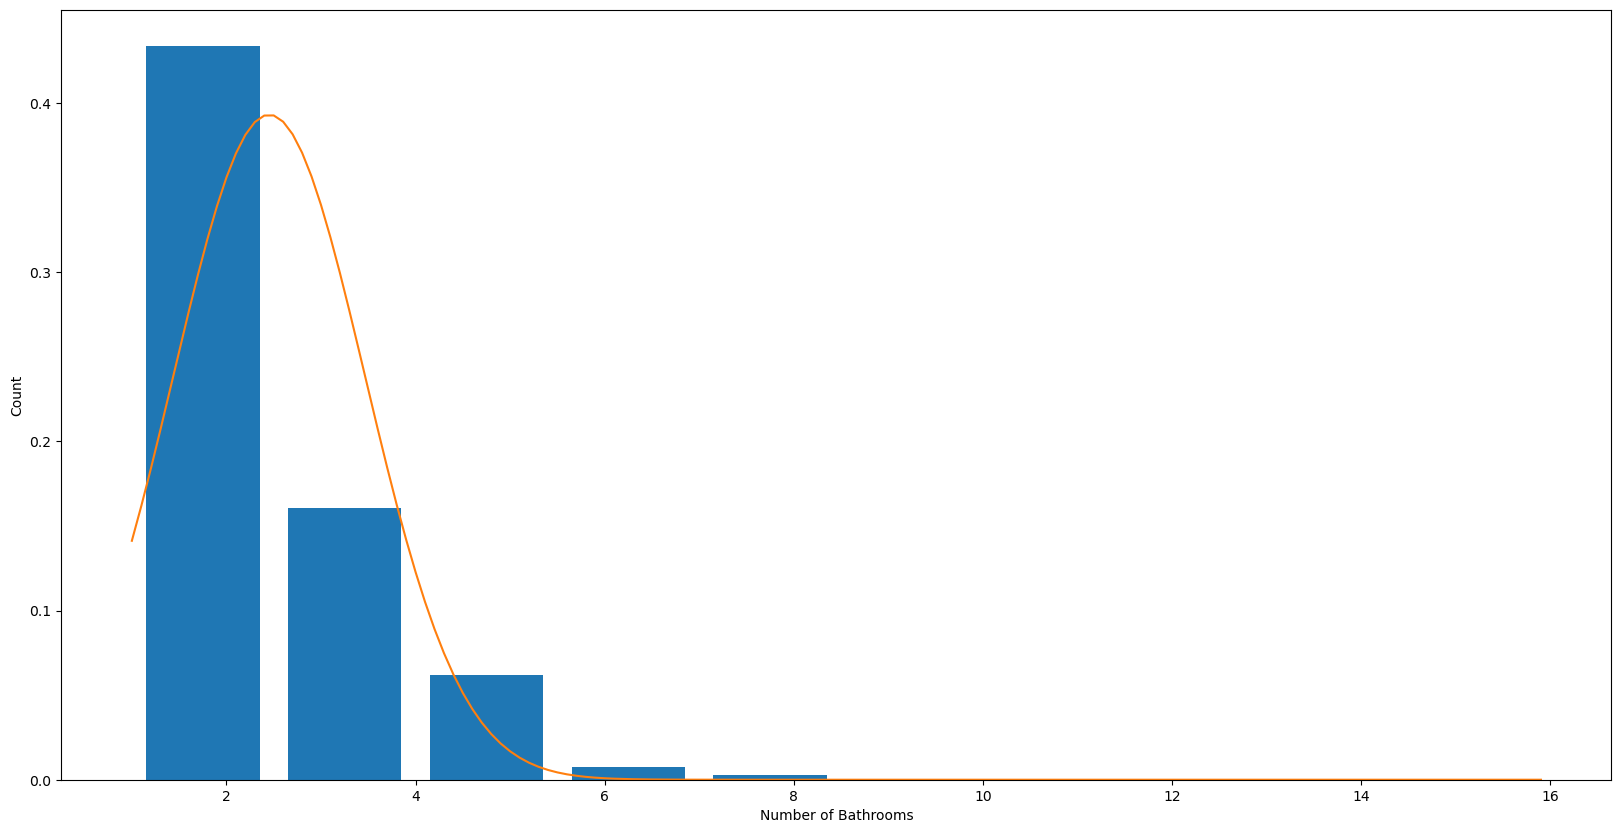

In [46]:
from scipy.stats import norm
import numpy as np
plt.figure(figsize=(20,10))
plt.hist(df7.bath,rwidth=0.8,density=True)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
rng=np.arange(df7.bath.min(),df7.bath.max(),0.1)
plt.plot(rng,norm.pdf(rng,df7.bath.mean(),df7.bath.std()))
plt.show()

In [47]:
df7[df7.bath>=df7.BHK+2].sample(5)

,location,total_sqft,bath,price,BHK,price_per_sqft
9257,o,3754.0,6.0,480.0,4,12786.361215
5334,Old Madras Road,3715.0,6.0,224.5,4,6043.068641
2741,Harlur,2240.0,5.0,155.0,3,6919.642857
8889,o,3563.0,6.0,310.0,4,8700.533258
3437,Hulimavu,3035.0,5.0,271.0,3,8929.159802


In [48]:
df8=df7[df7.bath<df7.BHK+2]

In [49]:
df8.shape

(7251, 6)

In [50]:
df9=df8.drop('price_per_sqft',axis='columns')
df9.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## Model Building and Training

In [51]:
## dummies
dummies=pd.get_dummies(df9.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,o
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df10=pd.concat([df9,dummies.drop('o',axis='columns')],axis='columns')

In [53]:
df10.head(5)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df11=df10.drop('location',axis='columns')

In [55]:
df11.shape

(7251, 245)

In [56]:
X=df11.drop('price',axis='columns')

In [57]:
y=df11.price

In [58]:
X.shape

(7251, 244)

In [59]:
y.shape

(7251,)

In [60]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [106]:
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [63]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [64]:
model.score(X_test,y_test)

0.8452277697874324

## Kfold crossvalidation

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [66]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

## GridSearchCv for best model selection with parameters

In [76]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\abhav\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\abhav\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687434,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.726599,"{'criterion': 'mse', 'splitter': 'best'}"


In [77]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [83]:
def predict_price(location,sqft,bath,BHK):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = BHK
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [85]:
predict_price('1st Phase JP Nagar',1000,2,2)

C:\Users\abhav\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677185246

In [86]:
predict_price('Indira Nagar',1000,2,2)

C:\Users\abhav\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.2781548400676

In [91]:
predict_price('Vishveshwarya Layout',3000,2,2)

C:\Users\abhav\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


159.06567615971352

In [93]:
predict_price('5th Block Hbr Layout',2000,2,3)

C:\Users\abhav\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.55029832006973

## Exporting Model File

In [107]:
import pickle
with open('bengaluru_real_estate_price_prediction_model.pickle','wb') as f:
    pickle.dump(model,f)

## Exporting columns for later uses

In [108]:
import json
columns={
    'columns': [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))